# CUSTOMER SEGMENTATION USING RFM ANALYSIS

A RFM is an analysis tool used to identify a company's best customers. A segmentation analysis helps create "important customers." These are the customers most likely to return on marketing investments. This analysis is useful for improving targeting, reducing costs, and boosting the return on advertising investments. The three elements of RFM analysis are defined as follows: 



 

Recency: In how many days has the customer last made a purchase? 

Frequency: What is a customer's transaction frequency? 


Monetary value: The amount of money spent by the customer?

Here, we calculate RFM scores and categorize the customers based on the RFM scores. This helps the business personnels to identify different types of customers based on their purchase patterns which can help in their business 

#### DATA PRE-PROCESSING

In [128]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

In [129]:
df = pd.read_excel("C:/Users/18137/Desktop/Online Retail.xlsx")

In [130]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [131]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [133]:
df= df[pd.notnull(df['CustomerID'])]


In [134]:
filtered_df=df[['Country','CustomerID']].drop_duplicates()


###### Top Fifteen Country's customers

<AxesSubplot:>

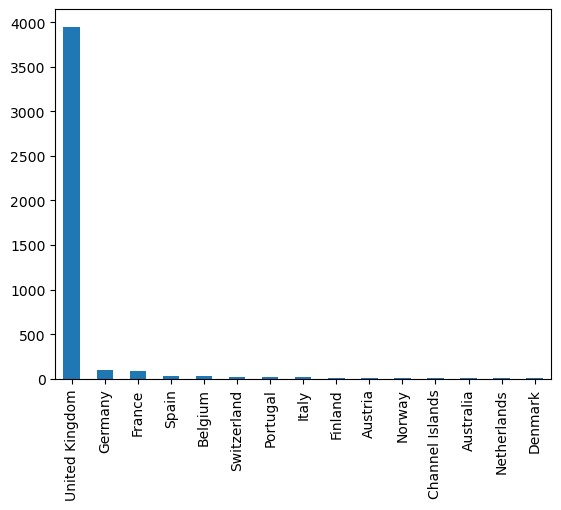

In [135]:
filtered_df.Country.value_counts()[:15].plot(kind='bar')


##### In the given dataset, most of the customers are from the "United Kingdom". So, we  filter data for United Kingdom customers.

In [136]:
uk_data=df[df.Country=='United Kingdom']



In [137]:
uk_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      361878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [138]:
uk_data.describe()


,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [139]:
uk_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      361878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [140]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]


In [141]:
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']


In [142]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()


(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [143]:
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])


In [144]:
uk_data.head()


,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


# RFM Analysis

#### We Calculate Recency, Frequency and Monetary Values inorder to categorize the customers

In [145]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})


In [146]:
rfm.columns


Index(['InvoiceDate', 'InvoiceNo', 'TotalPrice'], dtype='object')

### Changing the name of columns rfm.columns=['recency', 'monetary', 'frequency']

In [147]:
 rfm.columns=['recency', 'monetary', 'frequency'] 

In [148]:
rfm['recency'] = rfm['recency'].astype(int)


In [149]:
rfm.head()


,recency,monetary,frequency
CustomerID,,,
12346.0,325,2,0.00
12747.0,2,103,4196.01
12748.0,0,4642,29072.10
12749.0,3,231,3868.20
12820.0,3,59,942.34


### Calculating RFM Scores

In [150]:

rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))

### Creating & Analysing RFM Segments
##### Combine all three quartiles(r_quartile,f_quartile,m_quartile) in a single column, this rank will help you to segment the customers well group.

In [151]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)

rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

rfm[rfm["segment"] == "cant_loose"].head()
rfm[rfm["segment"] == "cant_loose"].index

#Top customers are shown.
rfm[rfm["RFM_SCORE"] == "555"].head()

#The worst customers are shown.
rfm[rfm["RFM_SCORE"] == "111"].head()

,recency,monetary,frequency,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
CustomerID,,,,,,,,


In [152]:
rfm.head()

,recency,monetary,frequency,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
CustomerID,,,,,,,,
12346.0,325,2,0.00,1,1,1,11,hibernating
12747.0,2,103,4196.01,5,5,4,55,champions
12748.0,0,4642,29072.10,5,5,5,55,champions
12749.0,3,231,3868.20,5,5,5,55,champions
12820.0,3,59,942.34,5,4,4,54,champions


In [153]:
rfm.reindex(axis=1)

,recency,monetary,frequency,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
CustomerID,,,,,,,,
12346.0,325,2,0.00,1,1,1,11,hibernating
12747.0,2,103,4196.01,5,5,4,55,champions
12748.0,0,4642,29072.10,5,5,5,55,champions
12749.0,3,231,3868.20,5,5,5,55,champions
12820.0,3,59,942.34,5,4,4,54,champions
...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,11,hibernating
18281.0,180,7,80.82,1,1,1,11,hibernating
18282.0,7,13,176.60,5,1,1,51,new_customers


In [154]:
rfm['segment'].value_counts()

hibernating            940
loyal_customers        700
champions              580
at_Risk                546
potential_loyalists    466
about_to_sleep         303
need_attention         177
promising               95
cant_loose              91
new_customers           52
Name: segment, dtype: int64

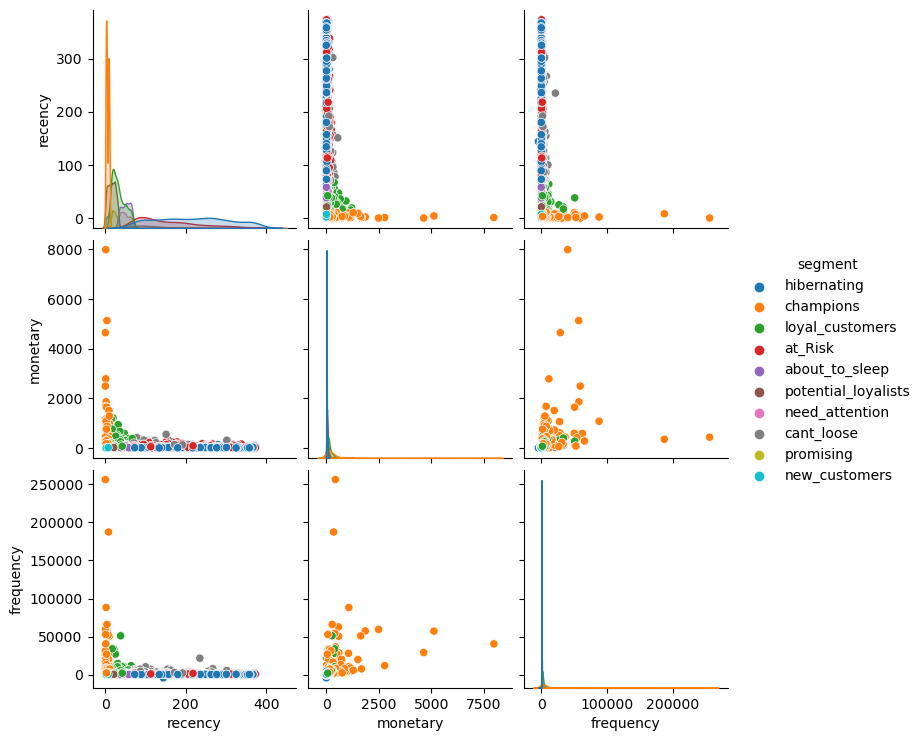

In [156]:
import seaborn as sns
sns.pairplot(rfm,hue='segment')

In [159]:
rfm = rfm.drop('RFM_SCORE', axis=1)

In [160]:
# Initialize LabelEncoder
le = LabelEncoder()

rfm['segment_encoded'] = le.fit_transform(rfm['segment'])

print(rfm)

            recency  monetary  frequency recency_score frequency_score  \
CustomerID                                                               
12346.0         325         2       0.00             1               1   
12747.0           2       103    4196.01             5               5   
12748.0           0      4642   29072.10             5               5   
12749.0           3       231    3868.20             5               5   
12820.0           3        59     942.34             5               4   
...             ...       ...        ...           ...             ...   
18280.0         277        10     180.60             1               1   
18281.0         180         7      80.82             1               1   
18282.0           7        13     176.60             5               1   
18283.0           3       756    2094.88             5               5   
18287.0          42        70    1837.28             3               4   

           monetary_score          se

# Split Data

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
rfm = rfm.drop('segment',axis=1)

In [163]:
train_df, test_df = train_test_split(rfm, test_size=0.2)

target = 'segment_encoded'
predictors = list(rfm.columns)
predictors.remove(target)

In [164]:
train_X = train_df[predictors]
train_y = train_df[target] 
test_X = test_df[predictors]
test_y = test_df[target] 

train_df.to_csv('rfm_train_df.csv', index=False)
train_X.to_csv('rfm_train_X.csv', index=False)
train_y.to_csv('rfm_train_y.csv', index=False)
test_df.to_csv('rfm_test_df.csv', index=False)
test_X.to_csv('rfm_test_X.csv', index=False)
test_y.to_csv('rfm_test_y.csv', index=False)

In [166]:
train_X

,recency,monetary,frequency,recency_score,frequency_score,monetary_score
CustomerID,,,,,,
17288.0,9,142,1419.73,5,4,5
13956.0,5,152,1026.42,5,4,5
12962.0,7,16,266.39,5,2,2
15808.0,306,210,3724.77,1,5,5
14567.0,35,34,1524.46,3,4,3
...,...,...,...,...,...,...
14810.0,40,255,2087.88,3,5,5
13899.0,16,19,388.52,4,2,2
16834.0,227,24,413.46,1,2,2


In [167]:
train_y

CustomerID
17288.0    3
13956.0    3
12962.0    8
15808.0    2
14567.0    5
          ..
14810.0    5
13899.0    8
16834.0    4
16990.0    4
16883.0    4
Name: segment_encoded, Length: 3160, dtype: int32